In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Вспомогательные функции**

In [367]:
def corr_matrix(data: pd.DataFrame, figsize: tuple = (17,5)):
    '''
    Функция для вывода матрицы корреляций с заданным figsize.
    '''
    correlation_matrix = data.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, linewidths=0.2)

**Начнем изучать датасет**

In [368]:
data = pd.read_csv('data.csv', sep='\t')

In [369]:
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3111,4,3500000.0,33.0,2017-01-25T00:00:00,1,2.7,9.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,11930.0,13373.0,0.0,NaN,0.0,NaN,495.0
18977,20,24900000.0,129.0,2017-12-20T00:00:00,3,3.0,9.0,75.0,5,NaN,...,15.0,2.0,Санкт-Петербург,32121.0,5080.0,0.0,NaN,3.0,457.0,398.0
8489,18,11900000.0,77.0,2016-10-19T00:00:00,2,4.0,4.0,38.0,3,NaN,...,12.9,NaN,Санкт-Петербург,20510.0,1190.0,1.0,473.0,3.0,29.0,741.0


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [371]:
numerical_data = data.select_dtypes(exclude=['object', 'bool'])

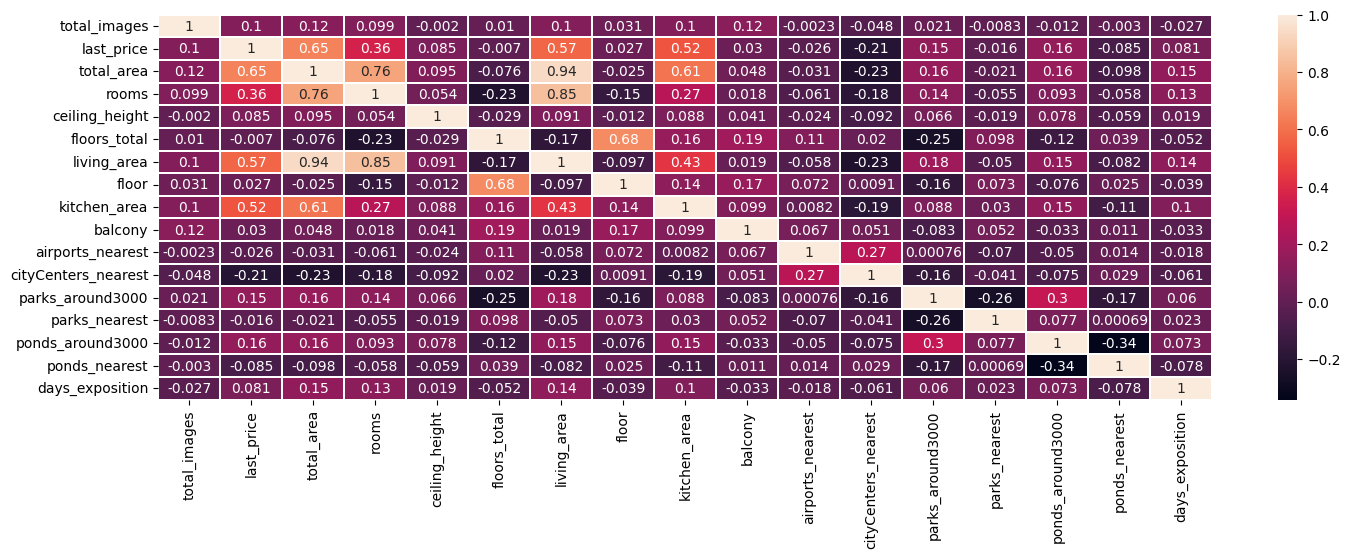

In [372]:
corr_matrix(numerical_data)

**Мы можем заметить, что цена на момент снятия публикации сильнее всего коррелирует с**
- площадью квартиры (м2)
- количеством комнат
- жилой площадью (м2)
- площадью кухни (м2)

А также отрицательно коррелирует с расстоянием до центра города

**Менее значительную корреляцию имеют**
- число парков в радиусе 3 км
- число водоёмов в радиусе 3 км
- количество балконов

In [373]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Исследуем колонки с пропущенными значениями**

In [374]:
null_values = data.isnull().sum().sort_values(ascending=False)

**Возможные причины возникновения пропусков**
- is_apartment - возможно, люди просто не знают, как понять, что их квартира является апартаментами 

- parks_nearest - разные причины: некоторые люди при отсутствии парков не будут заполнять информацию о них, кто-то не 
считает это важным, кто-то не знает точное число

- ponds_nearest - та же самая причина что и parks_nearest

- balcony - большинство людей ассоциирует квартиру с одним балконом

- ceiling height - при каких-то "стандартных" значениях никто не придает роли этому признаку. а вот если высота потолка 
большая, то это уже может быть одной из причин более высокой стоимости квартиры

- airports_nearest - мало покупателей интересуется такой информацией

- cityCenters_nearest - скорее всего, риелтор просто не знает расстояние, либо же оно не особо "хорошее", чтобы его ставить в объявление

- ponds_around3000 - то же самое, что и ponds_nearest

- parks_around3000 - то же самое, что и parks_nearest

- days_exposition - тут можно по-разному думать: если у риелтора есть возможность показывать, сколько дней висит объявление, то конечно его выгоднее отключить, особенно если квартира скромная - клиент может подумать, что, если никто не рассматривает ее, то что-то не так - отталкивающий фактор. другая причина - какие-то проблемы парсинга этих данных

- kitchen_area - возможно, кто-то не знает, сколько м2 кухня в квартире, возможно квартира сама по себе маленекая, чтобы это выставлять на показ - можно спугнуть клиента

- living area - склоняюсь к тому, что с большим шансом пропуски обусловены тем, что квартира сама по себе скромная/маленькая. в более редких случаях - риелтор не знает

- floors_total - разные ситуации: кто-то не считает это важным, кто-то думает, что квартира располагается на "обычном" этаже - ну к примеру 3-5 этаж. возможно, квартира находится в 3-х этажном или 2-х этажном здании, поэтому риелтор решил не указывать

- locality_name - возможно, это MCAR (Missing Completely at Random), потому что не знать название населенного пункта - очень редкая ситуация; риелтор мог быть невнимательным


**Заполнение пропущенных значений**

In [375]:
null_values[null_values > 0].index

Index(['is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony',
       'ceiling_height', 'airports_nearest', 'cityCenters_nearest',
       'ponds_around3000', 'parks_around3000', 'days_exposition',
       'kitchen_area', 'living_area', 'floors_total', 'locality_name'],
      dtype='object')

In [376]:
def change_is_apartment_values(value: str) -> str:
    if value == 'False':
        return 'No'
    if value == 'True':
        return 'Yes'
    return value

# Заполним пропуски модой
data['is_apartment'] = data['is_apartment'].fillna(data['is_apartment'].mode()[0])
data['is_apartment'] = data['is_apartment'].apply(change_is_apartment_values)

C:\Users\abein\AppData\Local\Temp\ipykernel_11220\3274683684.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(data['is_apartment'].mode()[0])


In [377]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [378]:
# Предполагая, что люди будут указывать кол-во балконов, когда их > 1, заполним пропуски единицей 
data['balcony'] = data['balcony'].fillna(1)

In [379]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean())

In [380]:
data['locality_name'] = 'Not specified'

In [381]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name              0
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [382]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

Так как у нас есть явная корреляция между living_area, kitchen_area, мы можем попробовать линейную интерполяцию, чтобы предсказать пропущеные значения 

In [383]:
data['living_area'] = data['living_area'].interpolate(method='linear')
data['kitchen_area'] = data['kitchen_area'].interpolate(method='linear')

Обработка пропущенных значений сделана правильно

In [384]:
data.isnull().sum().sum()

0

**Поменяем типы данных у столбцов**

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [ ]:

columns = ['days_exposition', 'airports_nearest', 'parks_nearest', 'parks_around3000', 'ponds_around3000',
            'airports_nearest', 'days_exposition', 'balcony', 'rooms', 'total_images',
            'cityCenters_nearest', 'floors_total', 'floor']

# Изменяем тип данных по принципу: в столбцах должно быть целое значение, а не с плавающей точкой. 
for col in columns:
    data[col] = data[col].astype(np.int64)

# Чтобы работать как с датой
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Начнем добавлять новые столбцы**

In [ ]:
# Стоимость квадратного метра
data['cost_per_squared_meter'] = data['last_price'] / data['total_area']

# День недели, месяц и год публикации объявления
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [ ]:
# Тип этажа: первый, последний, другой
conditions = [
    data['floor'] == data['floors_total'],
    data['floor'] == 1,
]
data['floor_type'] = np.select(conditions, ['последний', 'первый'], default='другой')

In [397]:
# Соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_total_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_total_area_ration'] = data['kitchen_area'] / data['total_area']

In [398]:
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,floor_type,living_area_total_area_ratio,kitchen_area_total_area_ration
15228,19,5150000.0,64.0,2017-12-11,2,2.76,14,37.0,7,False,...,1,502.0,43,80468.75,0,12,2017,другой,0.578125,0.1875
